In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# -----------------------------
# 1. LOAD DATA
# -----------------------------
df = pd.read_csv("Iris.csv")
df.columns = df.columns.str.strip()

print("===== 5 Data Teratas =====")
display(df.head())

print("\n===== Info Dataset =====")
print(df.info())

print("\n===== Statistik Deskriptif =====")
display(df.describe(include="all"))

===== 5 Data Teratas =====


,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa



===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB
None

===== Statistik Deskriptif =====


,sepal length,sepal width,petal length,petal width,label
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,1000
mean,5.865267,3.051833,3.767367,1.191000,NaN
std,0.805073,0.412472,1.751183,0.758022,NaN
min,4.300000,2.000000,0.900000,0.100000,NaN
25%,5.100000,2.800000,1.500000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.200000,1.800000,NaN


In [3]:
# -----------------------------
# 2. PEMISAHAN FITUR & TARGET
# -----------------------------
target_col = "label"
if target_col not in df.columns:
    raise ValueError(
        f"Kolom target '{target_col}' tidak ditemukan. "
        f"Kolom tersedia: {df.columns.tolist()}"
    )

# Pisahkan fitur dan target
X = df.drop(columns=[target_col])
y = df[target_col]

# Buang kolom ID/index jika ada (WAJIB untuk mencegah bias)
id_like = [c for c in X.columns if c.lower() in ["id", "index", "no", "nomor"]]
if id_like:
    X = X.drop(columns=id_like)

# Ambil hanya fitur numerik
X = X.select_dtypes(include="number")

print("\nKolom fitur yang dipakai:", X.columns.tolist())
print("Target:", target_col)
print("Shape fitur (X):", X.shape)
print("Jumlah kelas:", y.nunique())
print("Kelas unik:", y.unique())


Kolom fitur yang dipakai: ['sepal length', 'sepal width', 'petal length', 'petal width']
Target: label
Shape fitur (X): (3000, 4)
Jumlah kelas: 3
Kelas unik: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
# -----------------------------
# 3. TRAIN-TEST SPLIT (80/20)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain set:", X_train.shape, y_train.shape)
print("Test set :", X_test.shape, y_test.shape)


Train set: (2400, 4) (2400,)
Test set : (600, 4) (600,)


In [5]:
# -----------------------------
# 4. FEATURE SCALING (WAJIB)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("\nContoh data train setelah scaling:")
display(pd.DataFrame(X_train_scaled, columns=X.columns).head())



Contoh data train setelah scaling:


,sepal length,sepal width,petal length,petal width
0,0.667983,0.853436,0.991433,1.597561
1,-0.573045,2.067283,-1.295116,-1.043400
2,-0.945353,0.610666,-1.237952,-0.911352
3,1.040292,-0.117642,0.819942,1.465513
4,0.667983,0.125127,0.991433,0.805273



===== Tabel Hasil Eksperimen K (1..40) =====


,K,CV Accuracy,Error Rate
0,1,0.999583,0.000417
1,2,0.999583,0.000417
2,3,1.000000,0.000000
3,4,0.998750,0.001250
4,5,0.998750,0.001250
5,6,0.998333,0.001667
6,7,0.997917,0.002083
7,8,0.998333,0.001667
8,9,0.998333,0.001667
9,10,0.998333,0.001667


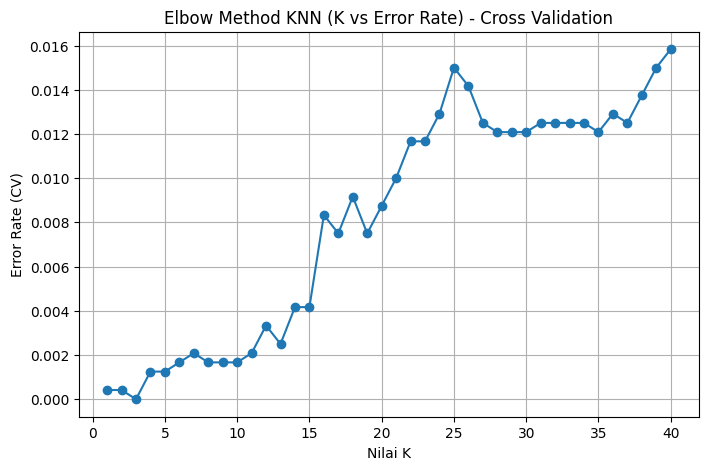


K optimal (error minimum): 3
Error minimum: 0.0
CV Accuracy pada K optimal: 1.0


In [6]:
# -----------------------------
# 5. ELBOW METHOD (K=1..40) pakai CV (lebih valid)
# -----------------------------
k_values = range(1, 41)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring="accuracy").mean()
    cv_scores.append(score)
    errors.append(1 - score)

result_df = pd.DataFrame({
    "K": list(k_values),
    "CV Accuracy": cv_scores,
    "Error Rate": errors
})

print("\n===== Tabel Hasil Eksperimen K (1..40) =====")
display(result_df)

plt.figure(figsize=(8,5))
plt.plot(k_values, errors, marker='o')
plt.xlabel("Nilai K")
plt.ylabel("Error Rate (CV)")
plt.title("Elbow Method KNN (K vs Error Rate) - Cross Validation")
plt.grid(True)
plt.show()

best_k = int(result_df.loc[result_df["Error Rate"].idxmin(), "K"])
best_error = result_df["Error Rate"].min()
best_acc = result_df.loc[result_df["Error Rate"].idxmin(), "CV Accuracy"]

print("\nK optimal (error minimum):", best_k)
print("Error minimum:", best_error)
print("CV Accuracy pada K optimal:", best_acc)

In [7]:
# -----------------------------
# 6. MODEL FINAL DENGAN K OPTIMAL
# -----------------------------
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_pred = final_knn.predict(X_test_scaled)


===== Confusion Matrix =====
[[200   0   0]
 [  0 200   0]
 [  0   0 200]]

===== Classification Report =====
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       200
Iris-versicolor       1.00      1.00      1.00       200
 Iris-virginica       1.00      1.00      1.00       200

       accuracy                           1.00       600
      macro avg       1.00      1.00      1.00       600
   weighted avg       1.00      1.00      1.00       600



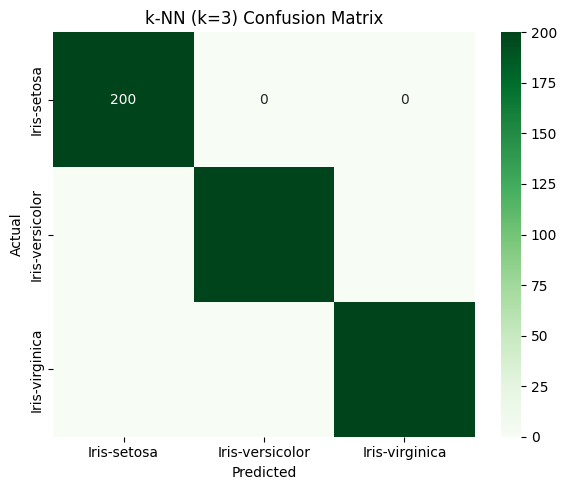

In [8]:
# -----------------------------
# 7. EVALUASI MODEL
# -----------------------------
cm = confusion_matrix(y_test, y_pred)

print("\n===== Confusion Matrix =====")
print(cm)

print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Greens',
    xticklabels=final_knn.classes_,
    yticklabels=final_knn.classes_
)
plt.title(f'k-NN (k={best_k}) Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [9]:
# -----------------------------
# 8. SIMULASI PREDIKSI DATA BARU
# -----------------------------
print("\n===== Simulasi Prediksi Data Baru =====")

dummy_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # setosa-like
    [6.4, 3.2, 4.5, 1.5]   # versicolor-like
])

print("Dummy data yang diuji:")
print(dummy_data)

dummy_scaled = scaler.transform(dummy_data)
dummy_pred = final_knn.predict(dummy_scaled)

for i, pred in enumerate(dummy_pred):
    print(f"Dummy ke-{i+1} diprediksi sebagai: {pred}")


===== Simulasi Prediksi Data Baru =====
Dummy data yang diuji:
[[5.1 3.5 1.4 0.2]
 [6.4 3.2 4.5 1.5]]
Dummy ke-1 diprediksi sebagai: Iris-setosa
Dummy ke-2 diprediksi sebagai: Iris-versicolor


c:\Users\intan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
